In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
def load_data(fname):
    with open(fname, "r") as f:
        # ignore `vertices: ...` at head and `Total: ..` at tail
        raws = f.readlines()
    header = [i.strip() for i in raws[0].split(',')]
    lines = [[j.strip() for j in i.split(',')] for i in raws[1:]]
    t = pd.DataFrame.from_records(lines, columns=header)
    res = t[header].apply(pd.to_numeric, errors='ignore')
    return res

In [3]:
def load_files(paths):
    frames = [load_data(i) for i in paths]
    res = pd.concat(frames)
    return res

In [4]:
def gen_xy(df=None, colx0='', coly0='', colx1='', coly1=''):
    tg = df.groupby(colx0)
    x0 = []
    y0 = []
    for k, v in tg[coly0].apply(lambda _: np.average(_)).items():
        x0.append(int(k))
        y0.append(v)
    x1 = []
    y1 = []
    tg = df.groupby(colx1)
    for k, v in tg[coly1].apply(lambda _: np.average(_)).items():
        x1.append(int(k))
        y1.append(v)
    return x0, y0, x1, y1

In [5]:
def plot_graph(xlabel='', ylabel='', x=[], y=[], x1=[], y1=[],
               label1='', label2=''):
    fig, ax = plt.subplots()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.scatter(x, y)
    ax.scatter(x1, y1)
    ax.plot(x, y, label=label1)
    ax.plot(x1, y1, label=label2)
    ax.legend([label1, label2])

In [6]:
def plot_graph1(xlabel='', ylabel='', x=[], y=[], label='', 
                scatter=True, plot=False):
    fig, ax = plt.subplots()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if scatter:
        ax.scatter(x, y)
    if plot:
        ax.plot(x, y, label=label)
    ax.legend()

# S1: EDBT vs Polyanya

[time] * [vnum, dist, K]

In [7]:
paths = ['s1-1-300.log', 's1-2-300.log', 's1-3-300.log', 's1-4-300.log', 's1-5-300.log']
df = load_files(paths)
df.head()

,K,order,dist,cost_ki,cost_edbt,vnum,density
0,1,1,9968.35,53.814,409074.00,5,0.355872
1,1,1,6203.66,33.524,69406.20,3,0.355872
2,1,1,1075.89,2.276,2299.77,2,0.355872
3,1,1,2576.24,8.014,128409.00,2,0.355872
4,1,1,9832.03,40.372,36570.30,7,0.355872


## Graph 1: [time, vnum]

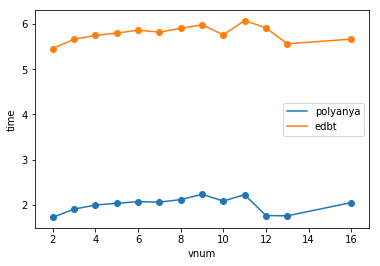

In [8]:
x0, y0, x1, y1 = gen_xy(df, 'vnum', 'cost_ki', 'vnum', 'cost_edbt')
y0 = np.log10(y0)
y1 = np.log10(y1)
plot_graph('vnum', 'time', x0, y0, x1, y1, 'polyanya', 'edbt')

## Graph 2: [time, dist]

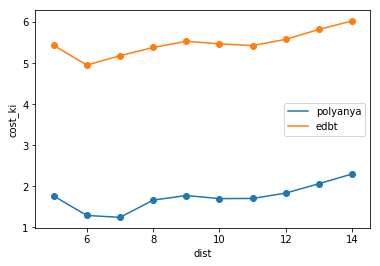

In [9]:
df2 = df.copy()
df2.dist = np.log2(df.dist).astype(int)
x0, y0, x1, y1 = gen_xy(df2, 'dist', 'cost_ki', 'dist', 'cost_edbt')
y0 = np.log10(y0)
y1 = np.log10(y1)
plot_graph('dist', 'cost_ki', x0, y0, x1, y1, 'polyanya', 'edbt')

## Graph 3: [time, K]

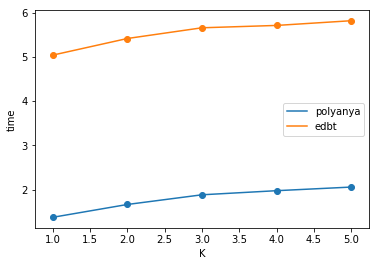

In [10]:
x0, y0, x1, y1 = gen_xy(df, 'K', 'cost_ki', 'K', 'cost_edbt')
y0 = np.log10(y0)
y1 = np.log10(y1)
plot_graph('K', 'time', x0, y0, x1, y1, 'polyanya', 'edbt')

# S2: Heuristic vs Polyanya
[generate node, pushed node, popped node, time, h-ratio] * [vnum, dist, density, K]

* generate node: how many nodes have been generated during the search
* pushed node: how many nodes have been pushed during the search
* popped node: how many nodes have been popped during the search
* h-ratio: heurstic elapsed time / total elapsed time

In [11]:
paths = ['s2-1-300.log', 's2-1-9000.log', 's2-2-300.log', 's2-3-300.log']
df = load_files(paths)
df.head()

,K,dist,cost_ki,cost_hi,h_cost,vnum,gen_ki,push_ki,pop_ki,gen_hi,push_hi,pop_hi,density
0,1,17623.5,249.483,632.294,555,8,34,15,538,8,4,55,0.017794
1,1,13609.6,120.269,250.358,223,6,21,3,316,6,3,23,0.017794
2,1,30960.5,1114.610,1087.890,949,8,115,18,2542,10,2,106,0.017794
3,1,22853.4,239.473,841.551,740,9,38,10,645,11,5,95,0.017794
4,1,26740.8,707.794,623.600,550,8,86,12,1801,10,3,60,0.017794


## Graph 1-3

* `[gen node, vnum]`

* `[push node, vnum]`

* `[pop node, vnum]`

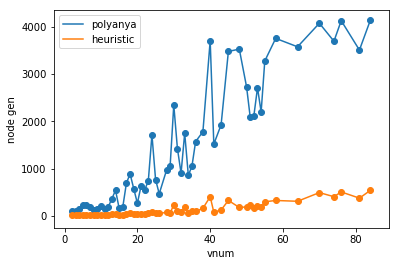

In [12]:
# [gen node, vnum]
x0, y0, x1, y1 = gen_xy(df, 'vnum', 'gen_ki', 'vnum', 'gen_hi')
plot_graph('vnum', 'node gen', x0, y0, x1, y1, 'polyanya', 'heuristic')

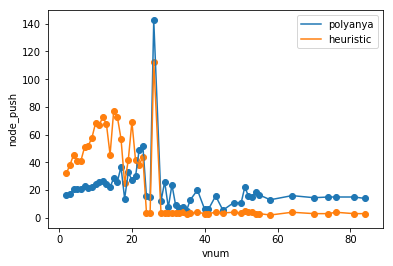

In [13]:
# [push node, vnum]
x0, y0, x1, y1 = gen_xy(df, 'vnum', 'push_ki', 'vnum', 'push_hi')
plot_graph('vnum', 'node_push', x0, y0, x1, y1, 'polyanya', 'heuristic')

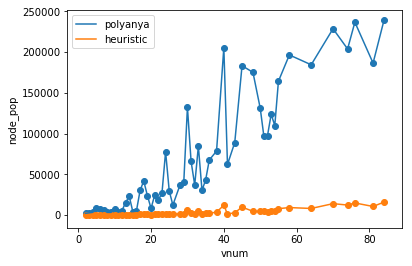

In [14]:
# [pop node, vnum]
x0, y0, x1, y1 = gen_xy(df, 'vnum', 'pop_ki', 'vnum', 'pop_hi')
plot_graph('vnum', 'node_pop', x0, y0, x1, y1, 'polyanya', 'heuristic')

Because of the `intermediate pruning`, `gen node` >> `push node`.

## Graph 4-7:

* `[gen node, dist]`

* `[push node, dist]`

* `[pop node, dist]`

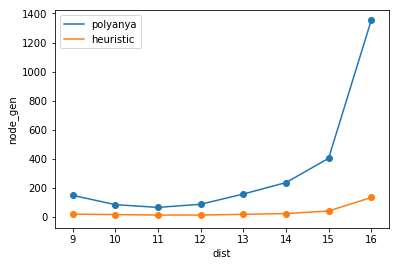

In [15]:
# [gen node, dist]
df2 = df.copy()
df2.dist = np.log2(df.dist).astype(int)
x0, y0, x1, y1 = gen_xy(df2, 'dist', 'gen_ki', 'dist', 'gen_hi')
plot_graph('dist', 'node_gen', x0, y0, x1, y1, 'polyanya', 'heuristic')

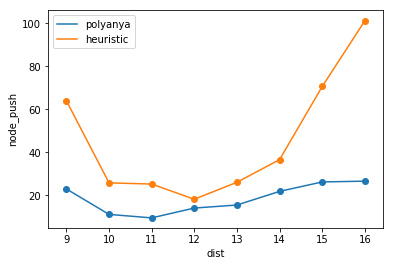

In [16]:
# [push node, dist]
df2 = df.copy()
df2.dist = np.log2(df.dist).astype(int)
x0, y0, x1, y1 = gen_xy(df2, 'dist', 'push_ki', 'dist', 'push_hi')
plot_graph('dist', 'node_push', x0, y0, x1, y1, 'polyanya', 'heuristic')

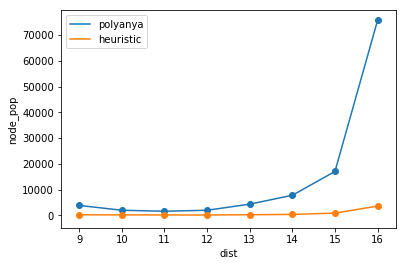

In [17]:
# [pop node, dist]
df2 = df.copy()
df2.dist = np.log2(df.dist).astype(int)
x0, y0, x1, y1 = gen_xy(df2, 'dist', 'pop_ki', 'dist', 'pop_hi')
plot_graph('dist', 'node_pop', x0, y0, x1, y1, 'polyanya', 'heuristic')

## Graph 8-11

* `[gen, push, pop] * density`

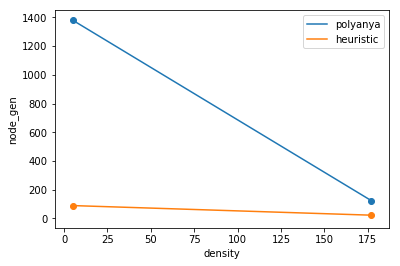

In [18]:
# [gen node, dist]
# only 2 densities currently
# full testing will examine 30 different densities
df2 = df.copy()
df2.density = (df.density * 10**4).astype(int)
x0, y0, x1, y1 = gen_xy(df2, 'density', 'gen_ki', 'density', 'gen_hi')
plot_graph('density', 'node_gen', x0, y0, x1, y1, 'polyanya', 'heuristic')

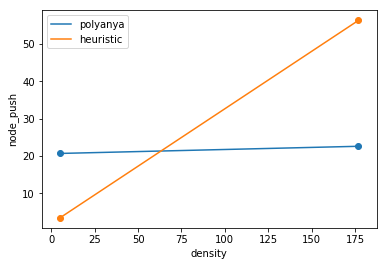

In [19]:
# [push node, dist]
# only 2 densities currently
# full testing will examine 30 different densities
df2 = df.copy()
df2.density = (df.density * 10**4).astype(int)
x0, y0, x1, y1 = gen_xy(df2, 'density', 'push_ki', 'density', 'push_hi')
plot_graph('density', 'node_push', x0, y0, x1, y1, 'polyanya', 'heuristic')

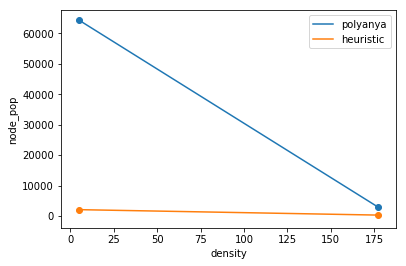

In [20]:
# [pop node, dist]
# only 2 densities currently
# full testing will examine 30 different densities
df2 = df.copy()
df2.density = (df.density * 10**4).astype(int)
x0, y0, x1, y1 = gen_xy(df2, 'density', 'pop_ki', 'density', 'pop_hi')
plot_graph('density', 'node_pop', x0, y0, x1, y1, 'polyanya', 'heuristic')

## Graph 12-15

* `[gen, push, pop] * K`

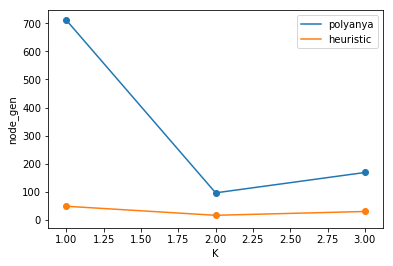

In [21]:
# [gen node, dist]
x0, y0, x1, y1 = gen_xy(df, 'K', 'gen_ki', 'K', 'gen_hi')
plot_graph('K', 'node_gen', x0, y0, x1, y1, 'polyanya', 'heuristic')

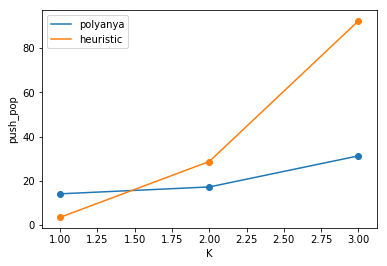

In [22]:
# [push node, dist]
x0, y0, x1, y1 = gen_xy(df, 'K', 'push_ki', 'K', 'push_hi')
plot_graph('K', 'push_pop', x0, y0, x1, y1, 'polyanya', 'heuristic')

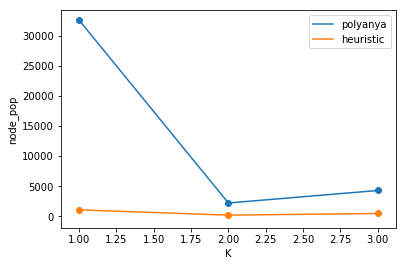

In [23]:
# [pop node, dist]
x0, y0, x1, y1 = gen_xy(df, 'K', 'pop_ki', 'K', 'pop_hi')
plot_graph('K', 'node_pop', x0, y0, x1, y1, 'polyanya', 'heuristic')

## Graph 16: [time, vnum]

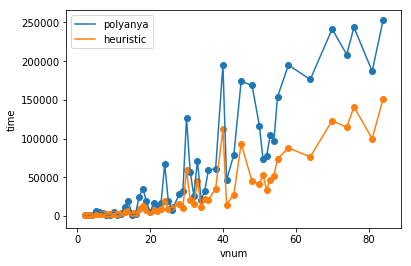

In [24]:
x0, y0, x1, y1 = gen_xy(df, 'vnum', 'cost_ki', 'vnum', 'cost_hi')
plot_graph('vnum', 'time', x0, y0, x1, y1, 'polyanya', 'heuristic')

## Graph 17: [time, dist]

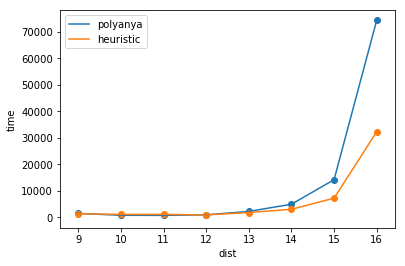

In [25]:
df2 = df.copy()
df2.dist = np.log2(df.dist).astype(int)
x0, y0, x1, y1 = gen_xy(df2, 'dist', 'cost_ki', 'dist', 'cost_hi')
plot_graph('dist', 'time', x0, y0, x1, y1, 'polyanya', 'heuristic')

## Graph 18: [time, K]

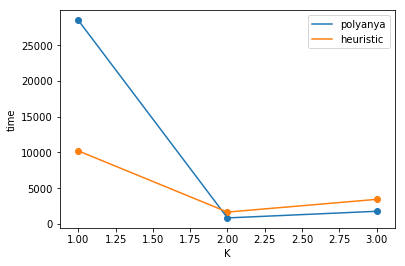

In [26]:
x0, y0, x1, y1 = gen_xy(df, 'K', 'cost_ki', 'K', 'cost_hi')
plot_graph('K', 'time', x0, y0, x1, y1, 'polyanya', 'heuristic')

## Graph 19: [time, density]

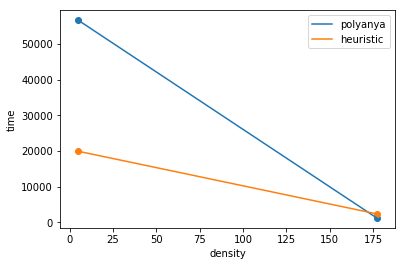

In [27]:
df2 = df.copy()
df2.density = (df.density * 10**4).astype(int)
x0, y0, x1, y1 = gen_xy(df2, 'density', 'cost_ki', 'density', 'cost_hi')
plot_graph('density', 'time', x0, y0, x1, y1, 'polyanya', 'heuristic')

## Graph 20: [h-ratio, vnum]

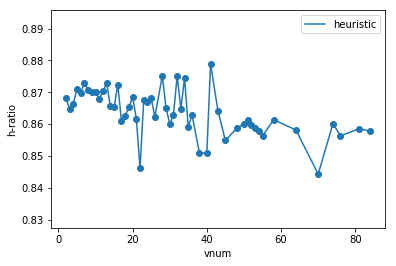

In [28]:
df2 = df.copy()
df2['ratio'] = df.h_cost / df.cost_hi
tg = df2.groupby('vnum')
x, y = [], []
for k, v in tg['ratio'].apply(lambda _: np.average(_)).items():
    x.append(int(k))
    y.append(v)
plot_graph1('vnum', 'h-ratio', x, y, 'heuristic', True, True)

## Graph 21: [h-ratio, dist]

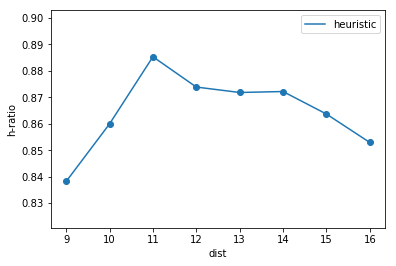

In [29]:
df2 = df.copy()
df2.dist = np.log2(df.dist).astype(int)
df2['ratio'] = df.h_cost / df.cost_hi
tg = df2.groupby('dist')
x, y = [], []
for k, v in tg['ratio'].apply(lambda _: np.average(_)).items():
    x.append(int(k))
    y.append(v)
plot_graph1('dist', 'h-ratio', x, y, 'heuristic', True, True)

## Graph 22: [h-ratio, K]

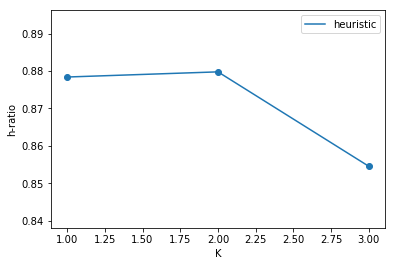

In [30]:
df2 = df.copy()
df2['ratio'] = df.h_cost / df.cost_hi
tg = df2.groupby('K')
x, y = [], []
for k, v in tg['ratio'].apply(lambda _: np.average(_)).items():
    x.append(int(k))
    y.append(v)
plot_graph1('K', 'h-ratio', x, y, 'heuristic', True, True)

## Graph 23: [h-ratio, density]

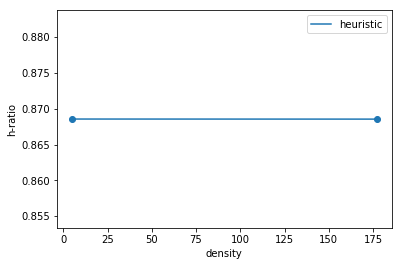

In [31]:
df2 = df.copy()
df2.density = (df.density * 10**4).astype(int)
df2['ratio'] =  df.h_cost / df.cost_hi
tg = df2.groupby('density')
x, y = [], []
for k, v in tg['ratio'].apply(lambda _: np.average(_)).items():
    x.append(int(k))
    y.append(v)
plot_graph1('density', 'h-ratio', x, y, 'heuristic', True, True)